# Neurons And Layers

we will explore the inner workings of neurons/units and layers. In particular, the lab will draw parallels to the models you have mastered in Course 1, the regression/linear model and the logistic model. The lab will introduce Tensorflow and demonstrate how these models are implemented in that framework.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

##### Tensorflow and Keras
Tensorflow is a machine learning package developed by Google. In 2019, Google integrated Keras into Tensorflow and released Tensorflow 2.0. Keras is a framework developed independently by François Chollet that creates a simple, layer-centric interface to Tensorflow. This course will be using the Keras interface.

### Neuron With Linear Regression Activation

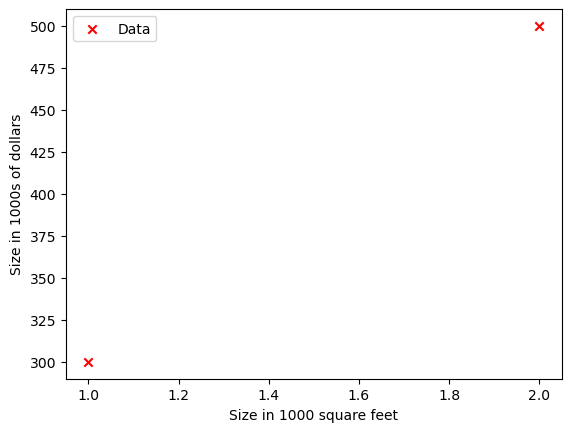

In [2]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32)           #(size in 1000 square feet)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)       #(price in 1000s of dollars)

plt.scatter(X_train, Y_train, marker='x', c='r', label="Data")
plt.xlabel("Size in 1000 square feet")
plt.ylabel("Size in 1000s of dollars")
plt.legend()

### Regression/Linear Model
<pre>

The function implemented by a neuron with no activation is the same as in Course 1, linear regression:
    f(W, b) = W . X + b
We can define a layer with one neuron or unit and compare it to the familiar linear regression function.
</pre>


In [3]:
linear_layer = tf.keras.layers.Dense(units=1, activation="linear")

In [4]:
# Let's examine the weights.
linear_layer.get_weights()

[]

There are no weights as the weights are not yet instantiated. Let's try the model on one example in X_train. This will trigger the instantiation of the weights. Note, the input to the layer must be 2-D, so we'll reshape it

In [5]:
a1 = linear_layer(X_train[0].reshape(1, 1))
print(a1)

tf.Tensor([[-1.3681487]], shape=(1, 1), dtype=float32)


The result is a tensor (another name for an array) with a shape of (1,1) or one entry.
Now let's look at the weights and bias. These weights are randomly initialized to small numbers and the bias defaults to being initialized to zero.

In [6]:
W, b = linear_layer.get_weights()
print(f"Weights = {W},\nbias = {b}")

Weights = [[-1.3681487]],
bias = [0.]


##### The weights are initialized to random values so let's set them to some known values.

In [7]:
W = np.array([[200]])
b = np.array([100])
linear_layer.set_weights([W, b])

linear_layer.get_weights()

[array([[200.]], dtype=float32), array([100.], dtype=float32)]

In [8]:
a1 = linear_layer(X_train[0].reshape(1, 1))
print(a1)
set_w, set_b = linear_layer.get_weights()
alin = np.dot(set_w,X_train[0].reshape(1,1)) + set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


##### They produce the same values! Now, we can use our linear layer to make predictions on our training data.

In [12]:
prediction = linear_layer(X_train)
prediction_np = np.dot( X_train, set_w) + set_b

In [13]:
prediction_np

array([[300.],
       [500.]], dtype=float32)

In [14]:
prediction

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[300.],
       [500.]], dtype=float32)>

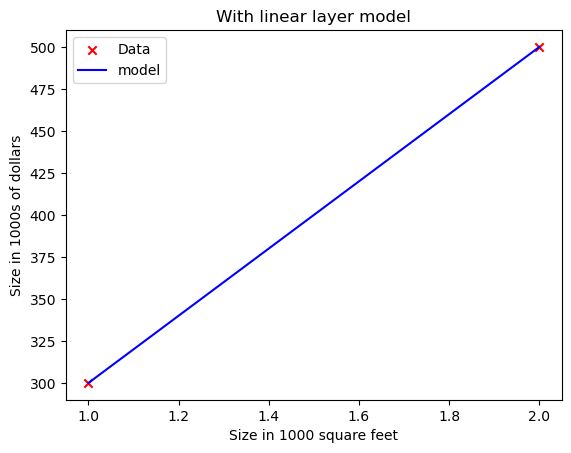

In [20]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32)           #(size in 1000 square feet)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)       #(price in 1000s of dollars)

plt.scatter(X_train, Y_train, marker='x', c='r', label="Data")
plt.plot(X_train, prediction, c="blue", label="model")
plt.title("With linear layer model")
plt.xlabel("Size in 1000 square feet")
plt.ylabel("Size in 1000s of dollars")
plt.legend()

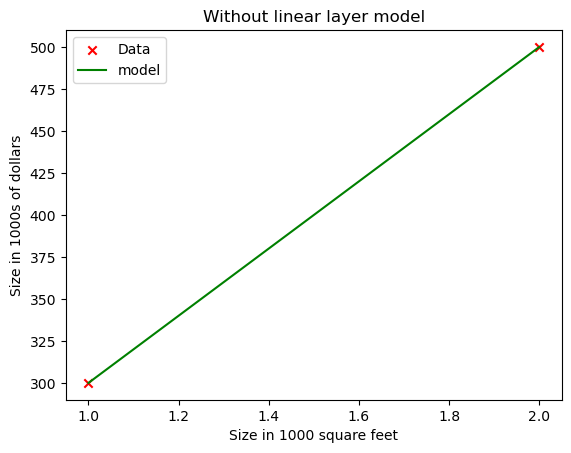

In [22]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32)           #(size in 1000 square feet)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)       #(price in 1000s of dollars)

plt.scatter(X_train, Y_train, marker='x', c='r', label="Data")
plt.plot(X_train, prediction_np, c="green", label="model")
plt.title("Without linear layer model")
plt.xlabel("Size in 1000 square feet")
plt.ylabel("Size in 1000s of dollars")
plt.legend()

### Neurons With Sigmoid activation

<pre>The function implemented by neuron/unit with a sigmoid activation is the same as in Course 1, logistic regression:
        f(w,b) = g(w . x + b)
where
        g(z) = 1/(1+e^-z)
Let's set and to some known values and check the model.</pre>

In [32]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

# X_train = np.array([[0, 1, 2, 3, 4, 5]], dtype=np.float32)
# Y_train = np.array([[0, 0, 0, 1, 1, 1]], dtype=np.float32)

print(f"X_train = {X_train}\nY_train = {Y_train}")

X_train = [[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]]
Y_train = [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]]


In [35]:
pos = Y_train == 1
neg = Y_train == 0

X_train[pos], X_train[neg]

(array([3., 4., 5.], dtype=float32), array([0., 1., 2.], dtype=float32))

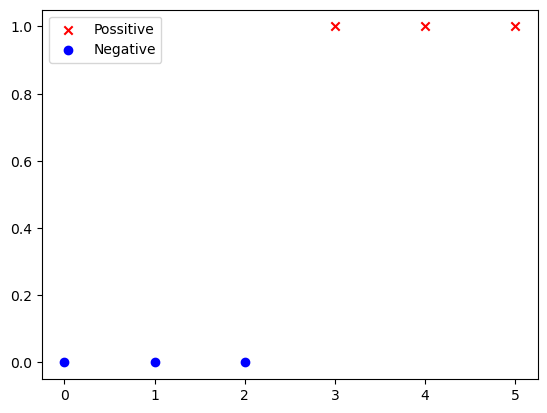

In [37]:
plt.scatter(X_train[pos], Y_train[pos], marker="x", c="r", label="Possitive")
plt.scatter(X_train[neg], Y_train[neg], marker="o", c="b", label="Negative")
plt.legend()

### Logistic Neuron
We can implement a 'logistic neuron' by adding a sigmoid activation. The function of the neuron is then described by (2) above.
This section will create a Tensorflow Model that contains our logistic layer to demonstrate an alternate method of creating models. Tensorflow is most often used to create multi-layer models. The Sequential model is a convenient means of constructing these models.

In [40]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(units=1, input_dim=1, activation="sigmoid", name="L1")
    ]
)

<b>model.summary()</b> shows the layers and number of parameters in the model. There is only one layer in this model and that layer has only one unit. The unit has two parameters,
and .

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
logistic_layer = model.get_layer("L1")
w,b = logistic_layer.get_weights()
print(w,b)
print(w.shape,b.shape)

[[-0.65455496]] [0.]
(1, 1) (1,)


Let's set the weight and bias to some known values

In [46]:
set_w = np.array([[2]])
set_b = np.array([-4.5])

# set_weights takes a list of numpy arrays
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [49]:
def sigmoidnp(z):
    return 1/(1+np.exp(-z))

a1 = model.predict(X_train[0].reshape(1,1))
print(a1)
alog = sigmoidnp(np.dot(set_w,X_train[0].reshape(1,1)) + set_b)
print(alog)

1/1 [==============================] - 0s 38ms/step
[[0.01098694]]
[[0.01098694]]


They produce the same values! Now, we can use our logistic layer and NumPy model to make predictions on our training data.

In [57]:
prediction = model.predict(X_train)
prediction

1/1 [==============================] - 0s 38ms/step


array([[0.01098694],
       [0.07585818],
       [0.37754068],
       [0.8175745 ],
       [0.97068775],
       [0.99592984]], dtype=float32)

In [60]:
y_hat = [np.argmax(i) for i in prediction]

In [61]:
y_hat, Y_train

([0, 0, 0, 0, 0, 0],
 array([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]], dtype=float32))

## Congratulations!!!
You built a very simple neural network and have explored the similarities of a neuron to the linear and logistic regression from Course 1.